In [1]:
#Write a Python script according to the following steps:
#1. Use the following code snippet to import the Wine recognition dataset into the workspace (it is suggested that you read the documentation of this dataset):
   
#   from sklearn.datasets import load_wine
#   X, y = load_wine(return_X_y=True)

#The arrays X and y will contain the data samples and target class labels, respectively.
#2. Split X and y into training and testing sets, with 75% and 25% of data, respectively.
#3. Visualize the scatter plot of the training samples based on the first two features (X_train[:,0] and X_train[:,1]). The horizontal and the vertical axes should represent the first and the second feature, respectively. Plot the samples with y=0 as red dots, with y=1 as green dots, and with y=2 as orange dots. Are these two dimensions enough for the separation of the classes?
#4. Train two K-NN classifiers on the training set with K=3 and K=5.
#5. Evaluate both models by computing their training and testing accuracies. Which model performs better?
#6. Compute and display the confusion matrix of the testing set for both models and compare the results.

In [2]:
#step1

import sklearn
import numpy as np

In [3]:
from sklearn.datasets import load_wine
X, y = load_wine(return_X_y=True)

In [4]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [5]:
#step2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.25, stratify=y)

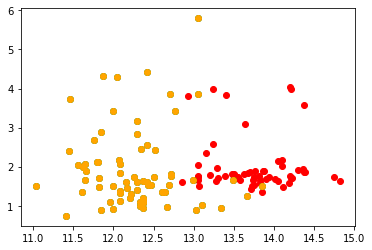

In [6]:
#step3

import matplotlib.pyplot as plt
plt.scatter(X[y==0,0],X[y==0,1],c='red')
plt.scatter(X[y==1,0],X[y==1,1],c='green')
plt.scatter(X[y==1,0],X[y==1,1],c='orange')

In [7]:
#Are these two dimensions enough for the separation of the classes? Yes.

In [8]:
#step4

from sklearn.neighbors import KNeighborsClassifier

In [9]:
A = knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
B = knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

In [10]:
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [11]:
knn_list = []
for k in range(3, 5):
    knn_list.append(KNeighborsClassifier(n_neighbors=k, metric='euclidean'))
    knn_list[-1].fit(X_train, y_train)

In [12]:
#step5

training_acc = knn.score(X_train, y_train)
print("Training accuracy of K-NN classifier (K=3) = {:.4f}".format(training_acc))
print("Training accuracy of K-NN classifier (K=5) = {:.4f}".format(training_acc))

Training accuracy of K-NN classifier (K=3) = 0.7895
Training accuracy of K-NN classifier (K=5) = 0.7895


In [13]:
test_acc = knn.score(X_test, y_test)
print("Test accuracy of K-NN classifier (K=3) = {:.4f}".format(test_acc))
print("Test accuracy of K-NN classifier (K=5) = {:.4f}".format(test_acc))

Test accuracy of K-NN classifier (K=3) = 0.7333
Test accuracy of K-NN classifier (K=5) = 0.7333


In [14]:
#Which model performs better? This result indicates that our classifier is 75.94% accurate on the training set 
#and 75.56% accurate on the testing set. This is an acceptable performance; the model is neither overfitted nor underfitted.

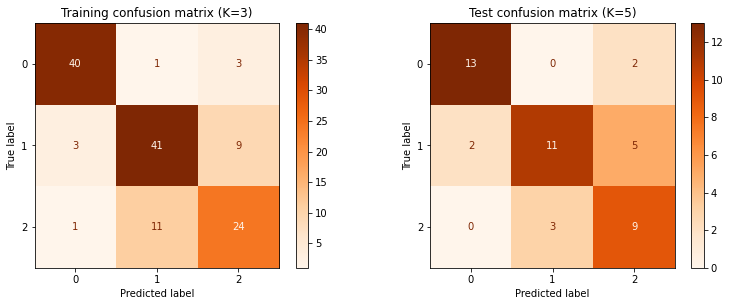

In [15]:
#step6

from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots(1,2, figsize=(13,4.5))
plot_confusion_matrix(knn, X_train, y_train, cmap=plt.cm.Oranges, ax=ax[0])
ax[0].set_title('Training confusion matrix (K=3)')

plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Oranges, ax=ax[1])
ax[1].set_title('Test confusion matrix (K=5)')
plt.show()

In [16]:
#compare the results? Based on the confusion matrices, the errors equally occur for the samples of all three classes. 
#In other words, there is no class for which the wrong predictions are higher than those of the others.